In [22]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.metrics import f1_score, precision_score, recall_score

In [23]:
os.chdir('/content/drive/My Drive/Bootcamp ML2020/')
os.listdir('.')

['Assignment 2',
 'Week_1_Python_1.ipynb',
 'Week_1_Python_2.ipynb',
 'Assignment 4',
 'Week_2_Python_Machine_Learning_1_Updated.ipynb',
 'heart.csv',
 'iris.csv',
 'Assignment 5',
 'Assignment 3',
 'Week_2_Python_Machine_Learning_2_Classification_1_Blank.ipynb',
 'Bonus_Assignment_1.ipynb',
 'Assignment 5 bonus.ipynb',
 'Assignment 6.ipynb',
 'pima-indians-diabetes.csv',
 'sonar.csv',
 'Assignment 7 Diabetes']

In [24]:
dataset = pd.read_csv('iris.csv')
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [25]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [26]:
dataset.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [27]:
dataset['Species'].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

In [28]:
dataset.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

**EDA Begin**

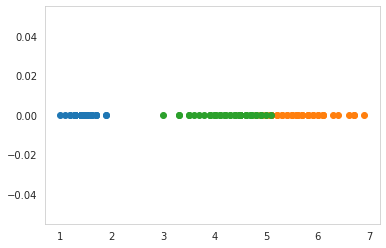

In [29]:
iris_setosa = dataset.loc[dataset["Species"] == "Iris-setosa"]
iris_virginica = dataset.loc[dataset["Species"] == "Iris-virginica"]
iris_versicolor = dataset.loc[dataset["Species"] == "Iris-versicolor"]
# iris_setosa
plt.plot(iris_setosa["PetalLengthCm"], np.zeros_like(iris_setosa["SepalLengthCm"]),'o')
plt.plot(iris_virginica["PetalLengthCm"], np.zeros_like(iris_virginica["SepalLengthCm"]),'o')
plt.plot(iris_versicolor["PetalLengthCm"], np.zeros_like(iris_versicolor["SepalLengthCm"]),'o')
plt.grid()
plt.show()


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


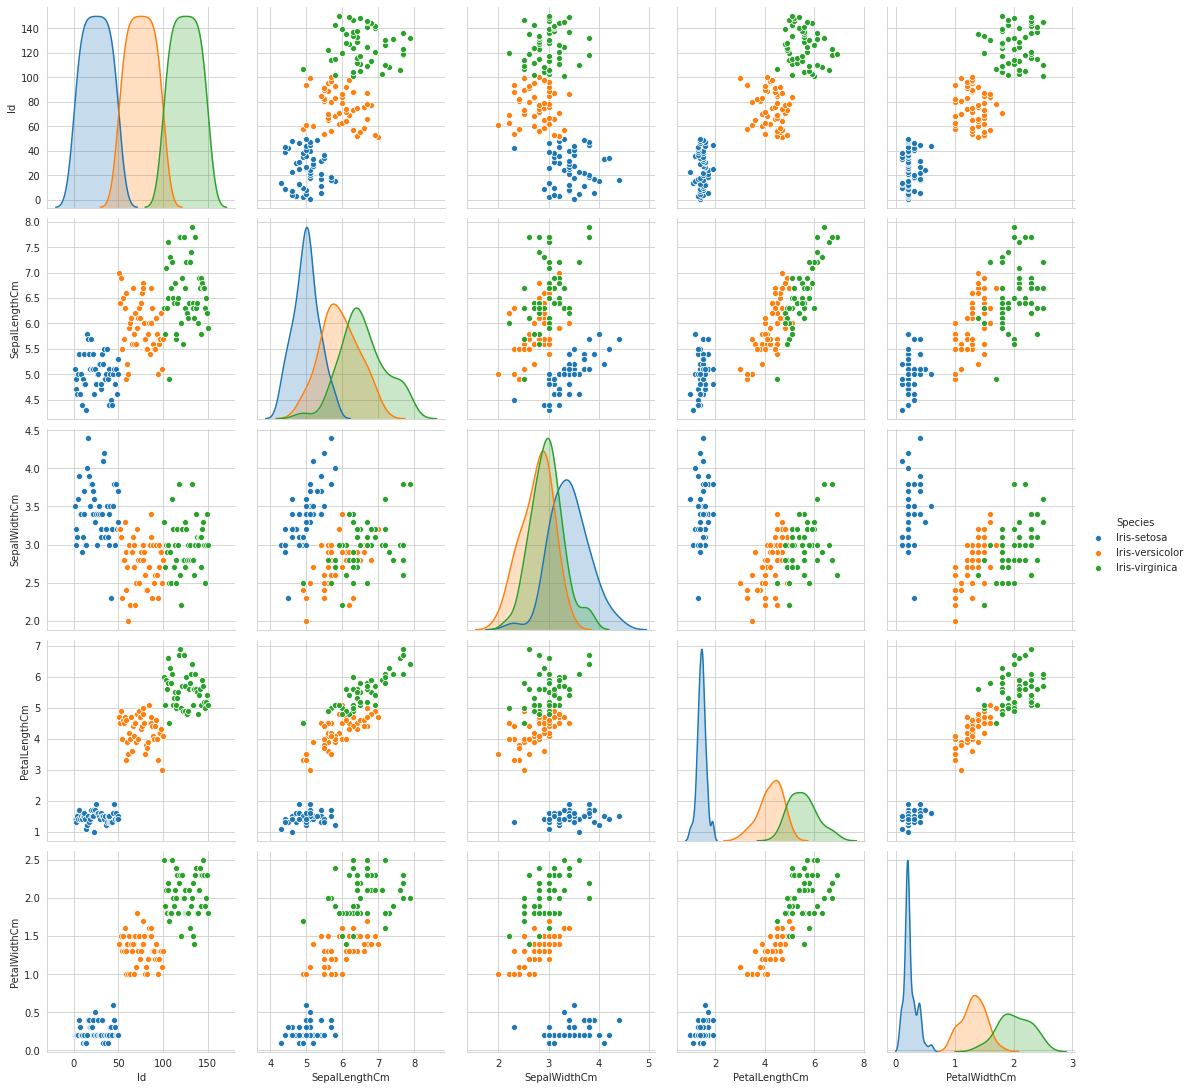

In [30]:
sb.set_style("whitegrid");
sb.pairplot(dataset, hue="Species", size=3);
plt.show()

**End Of EDA**

**Soal Assignment 6**

1. Untuk algoritma Random Forest, gunakan nilai estimator:
  * 50
  * 100
  * 200

  Bandingkanlah hasilnya dan apabila hasil accuracy dari masing-masing hyperparameter berubah, coba simpulkan alasannya!

2. Untuk algoritma SVM, gunakan kernel:
  * Polynomial
  * Linear

  Dan gunakan juga LinearSVC menggunakan linear kernel.

  Hint: https://scikit-learn.org/stable/modules/svm.html

  Bandingkanlah hasilnya dan apabila hasil accuracy dari masing-masing hyperparameter berubah, coba simpulkan alasannya!

3. Untuk algoritma k-NN, carilah nilai *k* yang terbaik dari nilai 1, 3, 5, 7, 9, 11, 13, dan 15.

In [31]:
Y = dataset['Species'] # Target prediksi
x = dataset.drop(['Id', 'Species'], axis=1) # Data Id tidak diperlukan

In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(x)
data_x = pd.DataFrame(X, columns=x.columns)

In [33]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data_x, Y, test_size=0.15)

**Soal nomor 1**
*Random Forest*

In [34]:
from sklearn.ensemble import RandomForestClassifier

def estimator_rf(nest):
  rf_model = RandomForestClassifier(n_estimators=nest, bootstrap=True, max_features = "sqrt")
  rf_model.fit(x_train, y_train)
  y_pred = rf_model.predict(x_test)
  print('Accuracy of Random Forest on train set: {:.2f}'.format(rf_model.score(x_train, y_train)))
  print('Accuracy of Random Forest on test set: {:.2f}'.format(rf_model.score(x_test, y_test)))
  print("f1 score         :",f1_score(y_test, y_pred, average="macro"))
  print("precision score  :",precision_score(y_test, y_pred, average="macro"))
  print("recal score      :",recall_score(y_test, y_pred, average="macro"))
  return

estimasi = [50,100,200]
for x in estimasi:
  print("untuk estimasi: ",x)
  estimator_rf(x)
  print()

untuk estimasi:  50
Accuracy of Random Forest on train set: 1.00
Accuracy of Random Forest on test set: 0.96
f1 score         : 0.9470899470899471
precision score  : 0.9696969696969697
recal score      : 0.9333333333333332

untuk estimasi:  100
Accuracy of Random Forest on train set: 1.00
Accuracy of Random Forest on test set: 0.96
f1 score         : 0.9470899470899471
precision score  : 0.9696969696969697
recal score      : 0.9333333333333332

untuk estimasi:  200
Accuracy of Random Forest on train set: 1.00
Accuracy of Random Forest on test set: 1.00
f1 score         : 1.0
precision score  : 1.0
recal score      : 1.0



**Kesimpulan**
Diantara setiap hyperparameter yang digunakan, hasil akurasi yang lebih baik dipakai pada algoritma forest regression adalah pada estimasi 200, dikarenakan pada saat mesin belajar pada kedalaman 200, mesin dapat memprediksi hasil akurasi yang paling optimal

**Soal No 2**
SVM

In [35]:
from sklearn.svm import SVC

def kernel_svc(ks):
  classifier_svc = SVC(kernel = ks)
  classifier_svc.fit(x_train, y_train)
  y_pred = classifier_svc.predict(x_test)
  print('Accuracy of SVC ',ks,' classifier on train set: {:.2f}'.format(classifier_svc.score(x_train, y_train)))
  print('Accuracy of SVC ',ks,' classifier on test set: {:.2f}'.format(classifier_svc.score(x_test, y_test)))
  print(f1_score(y_test, y_pred, average="macro"))
  print(precision_score(y_test, y_pred, average="macro"))
  print(recall_score(y_test, y_pred, average="macro"))

kernelsvc=['poly','linear']
for x in kernelsvc:
  print("SVC linear: ", x)
  kernel_svc(x)
  print()

SVC linear:  poly
Accuracy of SVC  poly  classifier on train set: 0.94
Accuracy of SVC  poly  classifier on test set: 0.91
0.8863636363636364
0.9444444444444445
0.8666666666666667

SVC linear:  linear
Accuracy of SVC  linear  classifier on train set: 0.98
Accuracy of SVC  linear  classifier on test set: 1.00
1.0
1.0
1.0



In [36]:
from sklearn.svm import LinearSVC

classifier_LinearSVC = SVC()
classifier_LinearSVC.fit(x_train, y_train)
y_pred = classifier_LinearSVC.predict(x_test)
print('Accuracy of LinearSVC classifier on train set: {:.2f}'.format(classifier_LinearSVC.score(x_train, y_train)))
print('Accuracy of LinearSVC classifier on test set: {:.2f}'.format(classifier_LinearSVC.score(x_test, y_test)))
print(f1_score(y_test, y_pred, average="macro"))
print(precision_score(y_test, y_pred, average="macro"))
print(recall_score(y_test, y_pred, average="macro"))

Accuracy of LinearSVC classifier on train set: 0.98
Accuracy of LinearSVC classifier on test set: 1.00
1.0
1.0
1.0


Untuk SVC model, yang paling akurat digunakan adalah SVC linear jika dibandingkan dengan svc poly

**Soal No 3**
KNN

In [37]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

def k_near(knn):
  knear = KNeighborsClassifier(knn)
  knear.fit(x_train, y_train)
  y_pred = knear.predict(x_test)
  print('Accuracy of KNN on train set: {:.2f}'.format(knear.score(x_train, y_train)))
  print('Accuracy of KNN on test set: {:.2f}'.format(knear.score(x_test, y_test)))
  print(f1_score(y_test, y_pred, average="macro"))
  print(precision_score(y_test, y_pred, average="macro"))
  print(recall_score(y_test, y_pred, average="macro"))

k=[1,3,5,7,9,11,13,15]
for x in k:
  print("K Nearest Neighbor: ", x)
  k_near(x)
  print()

K Nearest Neighbor:  1
Accuracy of KNN on train set: 1.00
Accuracy of KNN on test set: 1.00
1.0
1.0
1.0

K Nearest Neighbor:  3
Accuracy of KNN on train set: 0.94
Accuracy of KNN on test set: 1.00
1.0
1.0
1.0

K Nearest Neighbor:  5
Accuracy of KNN on train set: 0.95
Accuracy of KNN on test set: 1.00
1.0
1.0
1.0

K Nearest Neighbor:  7
Accuracy of KNN on train set: 0.97
Accuracy of KNN on test set: 1.00
1.0
1.0
1.0

K Nearest Neighbor:  9
Accuracy of KNN on train set: 0.97
Accuracy of KNN on test set: 1.00
1.0
1.0
1.0

K Nearest Neighbor:  11
Accuracy of KNN on train set: 0.96
Accuracy of KNN on test set: 1.00
1.0
1.0
1.0

K Nearest Neighbor:  13
Accuracy of KNN on train set: 0.96
Accuracy of KNN on test set: 1.00
1.0
1.0
1.0

K Nearest Neighbor:  15
Accuracy of KNN on train set: 0.95
Accuracy of KNN on test set: 1.00
1.0
1.0
1.0

